# Pixel count code for bone tissue mapping

The following code counts the number of pixels in a cortical bone tissue mapped image and is meant for research purpose. However, the code can be modified to count any color in an image, provided that the color codes are changed. 

**Code produces long format data frame.**

*Note: Due to the file size of some of tissue maps (i.e., adult humans, gorilla, chimpanzee, etc) and the average computing power this code is setup to run one image at a time. 


### Packages
Packages required 

In [ ]:
# !python3 -mpip install Pillow

### Modules
Modules to import/load

In [1]:
from PIL import Image
import numpy as np
import pandas as pd

### Load Image

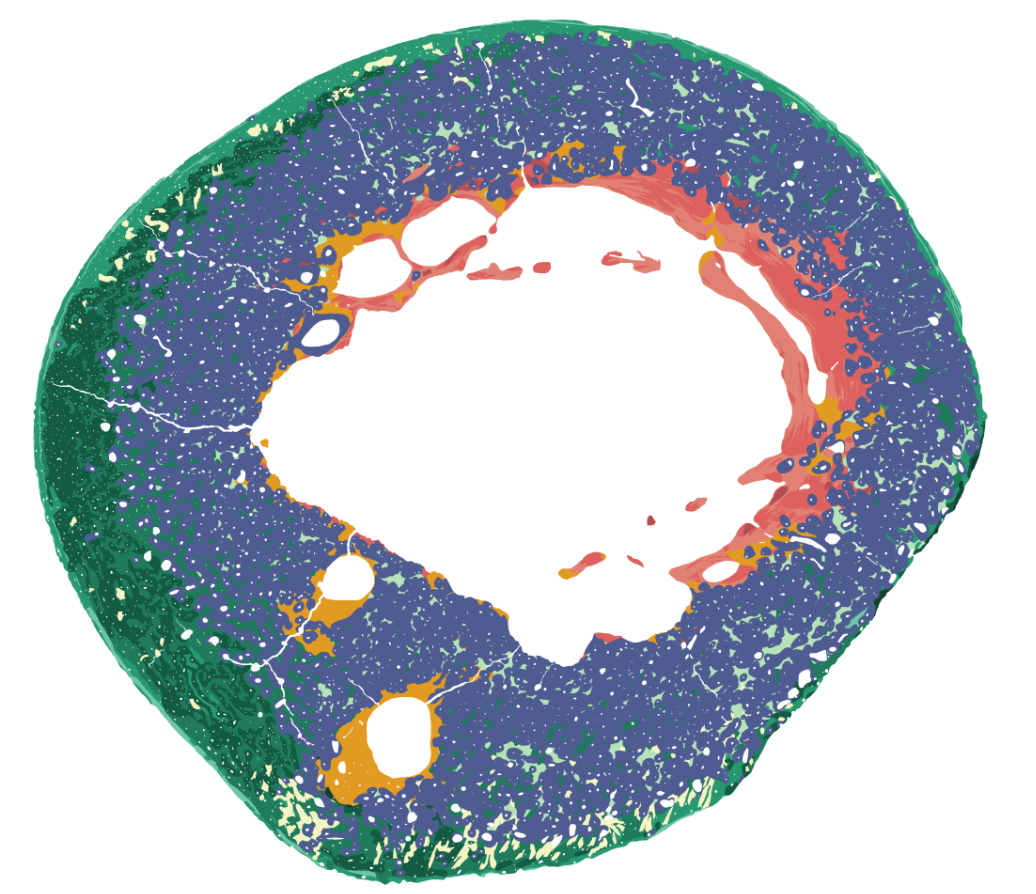

In [8]:
# Load the image
img = Image.open('GP125.PNG') # Change file name and location

img # We can see the image

'img' is an image object (i.e., our image) that contains methods and attributes related to the image, like dimensions, format, and pixel data.

In [3]:
img_array = np.array(img) # We are extracting the pixel data from 'img' object and putting it in a 3-D array ('height', 'width', 'channels').

In [ ]:
'height' = number of pixels in the vertical direction of the image
'width' = number of pixels in the horizontal direction
'channels' = RGB color channels, red, green, and blue with each color channel values ranging from 0 to 255

### Defining the colors and labels

In [4]:
# Define the colors and labels
colors = {
    "WOV": "#0d2d1d",
    "FLC": "#12422d",
    "FLC-LZPO": "#135b42",
    "PF": "#1f7b5c",
    "PF-LAM": "#289871",
    "LAM": "#6bc3a6",
    "ELAM": "#e18174",
    "ECCC": "#e19a22",
    "EPF": "#b54f52",
    "EPF-LAM": "#dd615e",
    "SF": "#f6f4c4",
    "INT": "#b5e2b8",
    "HAV": "#4e5c91",
    "BK": "#ffffff" # Background color of white
}

### Function to convert hex to RGB

In [5]:
# Function to convert hex to RGB
def hex_to_rgb(value):
    value = value.lstrip('#') # Removing # in front of our hexadecimal colors
    length = len(value) 
    return tuple(int(value[i:i+length//3], 16) for i in range(0, length, length//3)) # This is creating a tuple

This function will take our hexadecimal colors (e.g., '#FFA500') and convert it into RGB tuple (e.g, '(255, 165, 0)').

#### Code break down for academic collaborators with no Python knowledge or experience

**'def hex_to_rgb(value):'** 

This defines a new function (i.e., hex_to_rgb()).

**'value = value.lstrip('#')'**

This just removes '#' characters that we have in front of our hexadecimals colors.

**'length = len(value)'**

This gets the length of the string value (e.g., len('0d2d1d') is 6) and assigns it to the variable 'length'. 

**'return tuple(int(value[i:i+length//3], 16) for i in range(0, length, length//3))'**

The returns a tuple--a fixed-size, immutable sequence of objects--so we will an output of R, G, and B values.

**'int(..., 16)'**

This converts the hex segment (like FF or A5) into an integer using base 16 (hexadecimal). So FF becomes 255, and A5 becomes 165. 

**'value[i:i+length//3]'**

This slices the hex string to get a segment representing a color channel. For RRGGBB, it would slice RR, then GG, then BB.

**'for i in range(0, length, length//3)'**

This loops over the start indices of each segment of the hex string. For a typical 6-character hex code (RRGGBB), it would loop over the indices 0, 2, and 4.

### Pixel counts

In [6]:
# Count pixels for each color
pixel_counts = {} # Creates an empty dictionary 
for label, color in colors.items():
    rgb_color = hex_to_rgb(color)
    count = np.sum(np.all(img_array[:, :, :3] == rgb_color, axis=2))
    pixel_counts[label] = count

This is first converting the hex colors ro RGB colors and then counting the number of pixels in the image by color (i.e., img_array) and label that is associated with the color. 

#### Code break down for academic collaborators with no Python knowledge or experience

**'pixel_counts = {}'** 

Creates an empty disctionary that will be populated with the pixel counts and corresponding labels. Output will look like this: 

**'pixel_counts = {"WOV": 0, "FLC": 125,...}'**

**'for label, color in colors.items():'**

This will loops over each key-value pair in the **'colors'** dictionary. **'label'** will be the tissue type (like "WOV", "FLC", etc.), and color will be the corresponding hex color code.

**'rgb_color = hex_to_rgb(color)'**

This is the function above, converting the hex colors to RGB tuple. 

**'count = np.sum(np.all(img_array[:, :, :3] == rgb_color, axis=2))'**

**'img_array[:, :, :3]'**

This slices the image array to get the first three channels (R, G, B). 

The **':3'** means we are taking channels 0, 1, and 2 (which are the RGB channels). This is done to ensure we're only comparing RGB values, even if the image has an alpha (transparency) channel or any other additional channels.

**'img_array[:, :, :3] == rgb_color'**

This checks if each pixel in the image matches the given rgb_color. It produces a Boolean array of the same shape as img_array, but with **'True'** where pixels match and **'False'** otherwise.

**'np.all(..., axis=2)'**

This checks if all the RGB values of each pixel match the target rgb_color. The **'axis=2'** part ensures the comparison happens across the color channels, resulting in a 2D Boolean array where **'True'** indicates a match for the entire pixel and **'False'** indicates otherwise.

**'np.sum(...)'**

This counts how many **'True'** values are in the 2D Boolean array, effectively counting how many pixels in the image match the target color.

**'pixel_counts[label] = count'**

This stores the pixel counts for the current color in the **'pixel_counts'** in the dictionary with the tissue tpye **'label'** as the key. 


### Data frame for results

In [7]:
# Create a data frame for the results
df_pixel_counts = pd.DataFrame(list(pixel_counts.items()), columns=['Tissue Type', 'Pixel Count'])
df_pixel_counts

,Tissue Type,Pixel Count
0,WOV,0
1,FLC,156
2,FLC-LZPO,18886
3,PF,18905
4,PF-LAM,12592
5,LAM,30
6,ELAM,8318
7,ECCC,9820
8,EPF,524
9,EPF-LAM,9520


This code creates a data frame for which we can see our pixel counts for each color/tissue types. 

#### Code break down for academic collaborators with no Python knowledge or experience

**'pixel_counts.items()'**

This method returns a view of the dictionary's items as tuple pairs, where the first item in each tuple is the key, and the second item is the corresponding value. For pixel_counts, this would yield pairs like ('WOV', 12345), ('FLC', 67890), etc. 

**'list(...)'**

We had to convert the view to a list as the **'pd.DataFrame()'**  expects the data to be in a list or array. The **'items()'** method only returns a "view" on the dictionary's items, which is not a list. To make it suitable for creating a DataFrame, we convert it into a list.

**'pd.DataFrame(..., columns=['Tissue Type', 'Pixel Count'])'**

This creates a new pandas DataFrame from the list of tuples. The columns argument specifies the names of the columns in the resulting DataFrame. The first column will contain the tissue types (the keys from the dictionary), and the second column will contain the pixel counts (the values from the dictionary).

### Export file as a .csv

In [ ]:
df_pixel_counts.to_csv('pixel_counts.csv', index=False)
